In [1]:
import os
import random
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy
from Config import apikey

In [2]:
# Testing Citipy
citipy.nearest_city(22.99, 120.21).city_name

'tainan'

In [3]:
latitude = []
longitude = []

for x in range(0,5000):
    latitude.append(random.randint(-90, 90))
    longitude.append(random.randint(-180, 180))

print(latitude, longitude)
cities = []

if len(latitude) == len(longitude):
    for x in range(0, len(latitude)):
        city = citipy.nearest_city(round(latitude[x], 6), round(longitude[x], 6))
        print(f"Searching: {round(latitude[x], 6)}, {round(longitude[x], 6)}")
        print(f"Found {city.city_name}!")
        print("----------------")
        cities.append([city.city_name, round(latitude[x], 6), round(longitude[x], 6)])

[35, -41, -32, -6, 37, -24, -59, 84, -23, -3, 78, 69, 6, 30, 14, -65, 25, -5, -41, -53, 50, 1, 67, -64, -18, -4, 85, 1, -23, 89, -15, -35, 81, -48, -73, 42, 42, -77, 4, -51, 57, -28, -65, 23, -51, 73, 85, 45, -37, 14, 58, 37, 36, 64, -38, 12, -48, -89, 66, 62, 89, -57, -72, 63, 51, -6, -62, 38, -53, 76, -59, 69, -32, -51, 61, 52, -5, 75, 62, -68, 83, 40, 83, -90, 45, 9, 29, 42, -42, 63, -50, -37, 83, 10, 12, 72, -71, -54, 65, 46, -33, -64, 21, 54, 11, -5, -58, -22, -46, -66, -55, 4, -44, -1, 32, -88, 71, -82, 80, 34, -82, 85, 30, -68, 12, 75, -42, -34, -26, 74, -71, 69, -70, 85, -52, 7, 52, 62, -31, -54, 19, -42, -24, -38, -5, -22, 77, -11, -9, 20, -43, -80, -40, 19, 37, -5, 56, 2, 61, 76, -86, -47, -21, 76, 84, 74, 41, 74, -34, 6, 39, -78, 79, -12, -58, 76, 62, -41, 10, 67, -6, 75, -82, 71, -3, -34, -88, 49, 36, 90, 36, -75, -54, -37, -22, 56, 51, 47, -85, -16, 49, 53, -2, -4, -68, 57, -14, 90, 28, -55, -55, 63, -41, 68, 20, -42, 6, 54, -61, 7, 54, 14, -47, 70, -37, -21, -65, -62, -12

In [4]:
df = pd.DataFrame(cities)
df = df.drop_duplicates(subset=0, keep=False)
df[0].value_counts()
# Table Manipulation
df = df.rename(columns={0:'City Name', 1:"Latitude", 2:"Longitude"})
df = df.reset_index()
df = df.drop(columns=['index'])
test_df = df.head(5).copy()
len(df)

937

In [5]:
test_df.head(5)

,City Name,Latitude,Longitude
0,kindu,-3,26
1,jertih,6,103
2,ajdabiya,30,19
3,westpunt,14,-69
4,liuzhou,25,109


In [6]:
df

,City Name,Latitude,Longitude
0,kindu,-3,26
1,jertih,6,103
2,ajdabiya,30,19
3,westpunt,14,-69
4,liuzhou,25,109
...,...,...,...
932,yeletskiy,66,63
933,nanyuki,0,37
934,djibo,14,-2
935,kathu,8,97


In [7]:
## API Start!
df['Temperature'] = 0.0
df['Humidity'] = 0.0
df['Cloudiness'] = 0.0
df['Wind Speed'] = 0.0
df['City ID'] = np.nan
df['DateTime'] = 0
df['Country'] = ''

In [8]:
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country
0,kindu,-3,26,0.0,0.0,0.0,0.0,NaN,0,
1,jertih,6,103,0.0,0.0,0.0,0.0,NaN,0,
2,ajdabiya,30,19,0.0,0.0,0.0,0.0,NaN,0,
3,westpunt,14,-69,0.0,0.0,0.0,0.0,NaN,0,
4,liuzhou,25,109,0.0,0.0,0.0,0.0,NaN,0,
...,...,...,...,...,...,...,...,...,...,...
932,yeletskiy,66,63,0.0,0.0,0.0,0.0,NaN,0,
933,nanyuki,0,37,0.0,0.0,0.0,0.0,NaN,0,
934,djibo,14,-2,0.0,0.0,0.0,0.0,NaN,0,
935,kathu,8,97,0.0,0.0,0.0,0.0,NaN,0,


In [39]:
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country
0,mentok,-2,106,0.0,0.0,0.0,0.0,NaN,0,
1,wadi musa,30,36,0.0,0.0,0.0,0.0,NaN,0,
2,alta gracia,-32,-65,0.0,0.0,0.0,0.0,NaN,0,
3,takoradi,-3,-1,0.0,0.0,0.0,0.0,NaN,0,
4,muli,3,75,0.0,0.0,0.0,0.0,NaN,0,
...,...,...,...,...,...,...,...,...,...,...
990,anjozorobe,-18,48,0.0,0.0,0.0,0.0,NaN,0,
991,ngukurr,-16,135,0.0,0.0,0.0,0.0,NaN,0,
992,carutapera,4,-44,0.0,0.0,0.0,0.0,NaN,0,
993,muleba,-2,32,0.0,0.0,0.0,0.0,NaN,0,


In [9]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

# Build the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
lat = ''
lon = ''
query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"


for i, row in df.iterrows():
    c = row['City Name']
    lat = row['Latitude']
    lon = row['Longitude']
    query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"
    response = requests.get(query_url + f"&appid={apikey}").json()
    try:
        df.at[i, 'Humidity'] = response['main']['humidity']
        df.at[i, 'Temperature'] = response['main']['temp']
        df.at[i, 'Cloudiness'] = response['clouds']['all']
        df.at[i, 'Wind Speed'] = response['wind']['speed']
        df.at[i, 'DateTime'] = response['dt']
        df.at[i, 'Country'] = response['sys']['country']
        if response['id'] > 0:
            df.at[i, 'City ID'] = response['id']
            print(f"City:{response['name']} w/ City ID:{response['id']} found!")
        else:
            print(f"{c} not found")
    except KeyError:
        print(f"**** Data was not found, check this row ****")
        
print("Api calls are completed!")

City:Kindu w/ City ID:212902 found!
City:Jertih w/ City ID:1736405 found!
City:Al Burayqah w/ City ID:2215210 found!
**** Data was not found, check this row ****
City:Dongmen w/ City ID:1812356 found!
City:Manaccan w/ City ID:7294436 found!
City:Kenya w/ City ID:192950 found!
**** Data was not found, check this row ****
City:East New Britain Province w/ City ID:2097853 found!
**** Data was not found, check this row ****
City:Chayek w/ City ID:1528566 found!
City:Masalata w/ City ID:7015634 found!
City:Voron'yë w/ City ID:471855 found!
City:Faro (Sé) w/ City ID:8011989 found!
City:Mulchén w/ City ID:3879200 found!
City:Pursat w/ City ID:1821301 found!
**** Data was not found, check this row ****
City:Nerchinskiy Zavod w/ City ID:2019323 found!
**** Data was not found, check this row ****
City:Zholymbet w/ City ID:1516527 found!
**** Data was not found, check this row ****
City:Zahedan w/ City ID:1159301 found!
City:Dvinskoy Bereznik w/ City ID:577240 found!
City:France w/ City ID:301738

In [10]:
response

{'coord': {'lon': 131, 'lat': 37},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 79.97,
  'feels_like': 79.97,
  'temp_min': 79.97,
  'temp_max': 79.97,
  'pressure': 1010,
  'humidity': 78,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 9.78, 'deg': 95, 'gust': 10.07},
 'clouds': {'all': 100},
 'dt': 1627067329,
 'sys': {'country': 'KR', 'sunrise': 1627071264, 'sunset': 1627122616},
 'timezone': 32400,
 'id': 1833763,
 'name': 'Ulchin',
 'cod': 200}

In [11]:
df['City ID'].value_counts()

1833763.0    2
2023584.0    2
2097853.0    2
1498161.0    2
192950.0     2
            ..
1795770.0    1
1035025.0    1
608398.0     1
5984673.0    1
3471394.0    1
Name: City ID, Length: 763, dtype: int64

In [12]:
df.drop_duplicates(subset=['City ID'], keep='first', inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df['City ID'] = df['City ID'].astype(int)
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime,Country
0,kindu,-3,26,82.74,30.0,100.0,2.62,212902,1627067080,CD
1,jertih,6,103,80.69,75.0,100.0,8.68,1736405,1627067080,MY
2,ajdabiya,30,19,77.95,75.0,0.0,16.46,2215210,1627067080,LY
4,liuzhou,25,109,81.27,76.0,100.0,4.29,1812356,1627067081,CN
5,falmouth,50,-5,66.00,74.0,100.0,26.22,7294436,1627067081,GB
...,...,...,...,...,...,...,...,...,...,...
930,bhairab bazar,24,91,82.45,92.0,100.0,9.17,1185263,1627067327,BD
931,zomin,40,68,86.70,18.0,0.0,5.35,1513886,1627067327,UZ
933,nanyuki,0,37,58.77,79.0,6.0,8.72,184433,1627067328,KE
934,djibo,14,-2,92.55,38.0,66.0,15.43,2597264,1627067328,BF


In [45]:
# Fix up the lattitude and longitude
for i, row in df.iterrows():
    c = row['City Name']
    api_url = f"{url}&units=imperial&city={c}"
    response = requests.get(api_url + f"&appid={apikey}").json()
    df.at[i, 'Latitude'] = response['coord']['lat']
    df.at[i, 'Temperature'] = response['coord']['lng']

KeyError: 'coord'

In [13]:
response

{'coord': {'lon': 131, 'lat': 37},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 79.97,
  'feels_like': 79.97,
  'temp_min': 79.97,
  'temp_max': 79.97,
  'pressure': 1010,
  'humidity': 78,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 9.78, 'deg': 95, 'gust': 10.07},
 'clouds': {'all': 100},
 'dt': 1627067329,
 'sys': {'country': 'KR', 'sunrise': 1627071264, 'sunset': 1627122616},
 'timezone': 32400,
 'id': 1833763,
 'name': 'Ulchin',
 'cod': 200}

In [14]:
df.to_csv("../exported_city_data.csv")

north_df = df.loc[df['Latitude'] >= 0]
south_df = df.loc[df['Latitude'] < 0]

In [98]:
# Make a thing that can scatterplot on repeat
graph_list = ['Temperature', "Humidity", 'Cloudiness', 'Wind Speed']

def scatterPlotIt(col, name, df, hem_name):
    x = df
    hem_name = 99
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.iloc[:,1], x.iloc[:,col])
    regress_values = x.iloc[:,1] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    cc = st.pearsonr(x.iloc[:,col], x.iloc[:,1])
    plt.scatter(x.iloc[:,1], x.iloc[:,col], facecolors="red", edgecolors="black", alpha=.8)
    plt.grid()
    plt.xlabel(f"Latitude")
    plt.ylabel(f"{name}")
    if hem_name == 0:
        plt.title(f"{name} vs Latitude in The Northern Hemisphere")
        plt.savefig(f"{name} vs Latitude in The Northern Hemisphere")
    if hem_name == 1:
        plt.title(f"{name} vs Latitude in The Southern Hemisphere")
        plt.savefig(f"{name} vs Latitude in The Southern Hemisphere")
    else:
        plt.title(f"{name} vs Latitude in the World")
        plt.savefig(f"{name} vs Latitude in the World")


#     Draw the Line
    plt.plot(x.iloc[:,1], regress_values)

#     Setting the Min and Max limitations to dynamically put the annotations
    ymin = x.iloc[:,col].min()
    xmin = x.iloc[:,1].min()
    ymax = x.iloc[:,col].max()
    xmax = x.iloc[:,1].max()
    plt.ylim(ymin - (ymin * .1), (ymax + ymax * .05))
    plt.annotate(line_eq, (xmax ,ymax - 3))
    plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (xmax, ymax - 10))
    plt.show()




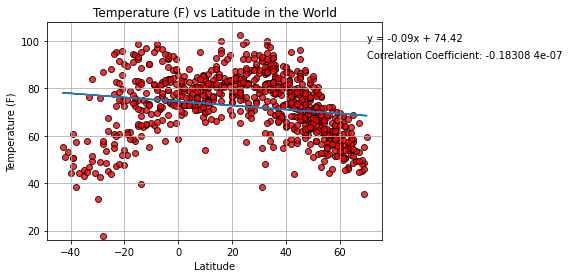

In [99]:
scatterPlotIt(3, "Temperature (F)", df, 99)

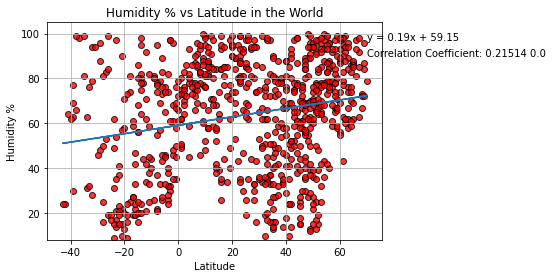

In [100]:
scatterPlotIt(4, "Humidity %", df, 99)

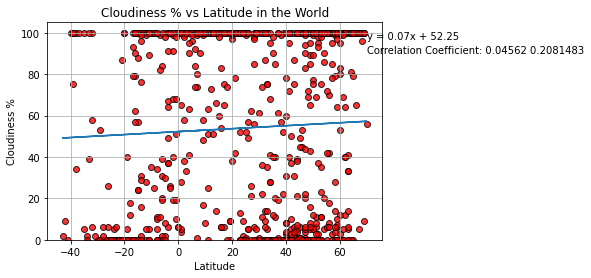

In [101]:
scatterPlotIt(5, "Cloudiness %", df, 99)

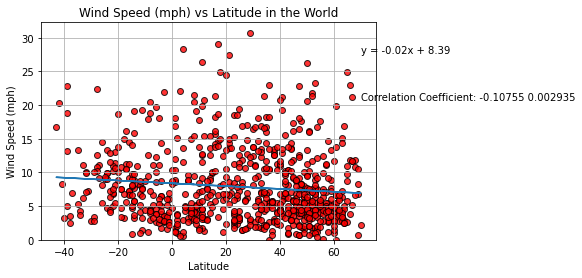

In [102]:
scatterPlotIt(6, "Wind Speed (mph)", df, 99)

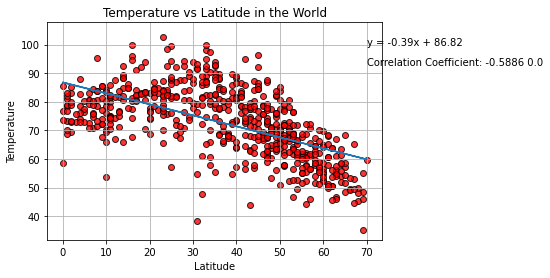

In [103]:
scatterPlotIt(3, graph_list[0], north_df, 0)

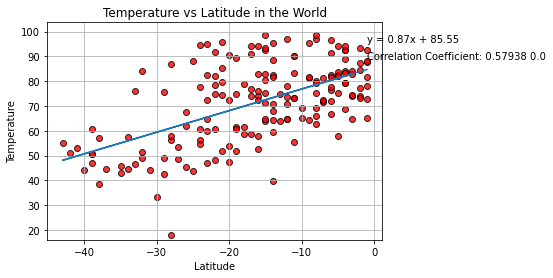

In [104]:
scatterPlotIt(3, graph_list[0], south_df, 1)

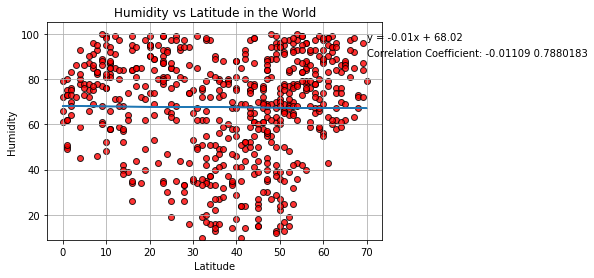

In [105]:
scatterPlotIt(4, graph_list[1], north_df, 0)

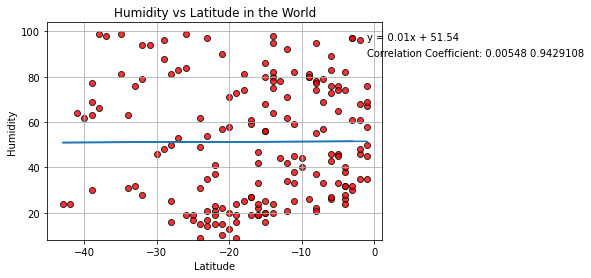

In [106]:
scatterPlotIt(4, graph_list[1], south_df, 1)

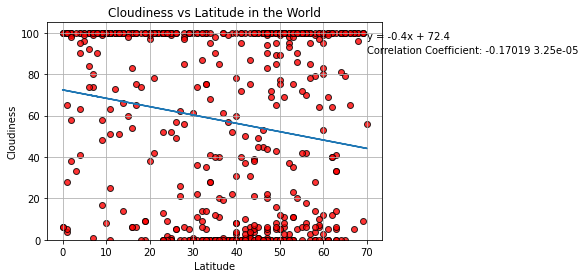

In [107]:
scatterPlotIt(5, graph_list[2], north_df, 0)

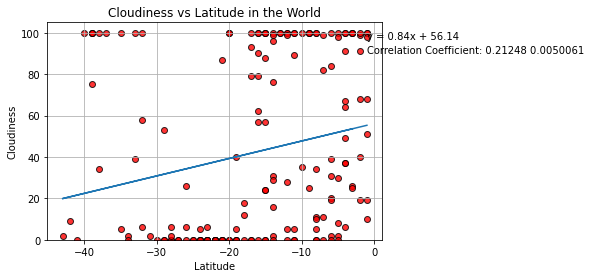

In [108]:
scatterPlotIt(5, graph_list[2], south_df, 1)

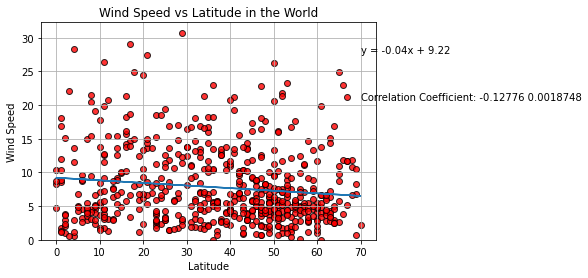

In [109]:
scatterPlotIt(6, graph_list[3], north_df, 0)

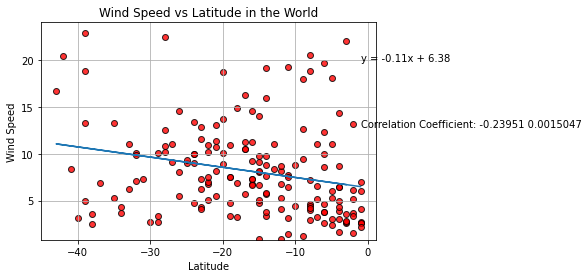

In [110]:
scatterPlotIt(6, graph_list[3], south_df, 1)